# Measure Mueller Matrix with Camera

## Preparation

Start by loading the required modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datetime
import cv2
from PIL import Image
from py_lab.setups.polarimeter import Polarimeter, degrees
from py_lab.config import CONF_POLARIMETER
from py_lab.camera import Camera
from py_pol.mueller import Mueller, degrees, create_Mueller, Stokes

number of processors: 4
total memory        : 7.9 Gb
available memory    : 60 %
max frequency       : 3401 GHz


## Folder to save data

In [3]:
%cd D:\Experimentos\Medidas_2D

D:\Experimentos\Medidas_2D


## Initialize Polarimeter Object

Use_daca as false to measure with the camera, even though we use Reference PHD

In [4]:
pol = Polarimeter(use_daca=False)

Background cleared


In [6]:
pol.Open()

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



### Check Motor

In [7]:
pol.motor.Move_Absolute(pos=360*np.ones(4, dtype=float), move_time=5, units="deg")

array([360., 360., 360., 360.])

In [8]:
pol.motor.Move_Absolute(pos=1)

array([0.994, 0.994, 0.994, 0.994])

In [9]:
pol.motor.Home()

### Set Camera Properties

In [10]:
pol.camera.Set_Property_Auto(name="Exposure", value=0)
pol.camera.Set_Property(name="Exposure", value=1)
pol.camera.Set_Property_Auto(name="Gain", value=0)
pol.camera.Set_Property(name="Framerate", value=3)
pol.camera.Set_Property_Auto(name="Resolution", value=0)
pol.camera.Set_Property(name="Resolution", value=[2560,1920])

Background cleared
Background cleared
Background cleared
Property uEye cannot be automatically handled by Resolution
uEye camera can't set the resolution. Use Set_ROI method instead.
Background cleared


In [11]:
pol.camera.Start_Live(view=True)

## Load Measurements
Load the Mueller Matrix of Mirror 

In [20]:
# %cd D:\Experimentos\Medidas_0D\Medidas_22_03_10
# ## Beam Splitter en Reflexión
# data = np.load("Beam_Splitter_Ref.npz")
# Beam_Spltter_Ref = Mueller().from_components(data["Mcomp"])

# ## Beam Splitter en Transmisión
# data = np.load("Beam_Splitter_Trans.npz")
# Beam_Spltter_Trans = Mueller().from_components(data["Mcomp"])

# %cd D:\Experimentos\Medidas_0D\Medidas_22_03_15
# ## Objetivo
# data = np.load("Objetivo.npz")
# Objetivo = Mueller().from_components(data["Mcomp"])

## Matriz Mueller del Espejo
data = np.load("Test.Espejo_45_Degrees.npz")
Espejo_45_Degrees = Mueller().from_components(data["Mcomp"])
    

## Photodiode and Camera Background

We have to measure and record the signal measured by the photodetector and camera with the diode offline. The experiment should be as covered as possible to avoid light from unknown sources. Also, lab lights must be off.

In [21]:
# Apagar diodo
pol.daca.Get_Signal(is_background=True, verbose=True)
_ = pol.camera.Get_Image(is_background=True, stadistics=True)

Reference:  -0.0104215914
Signal:  2.8402782338750003
Staistics of the image:
  - Max:  2.0.
  - Min:  0.0.
  - Mean: 0.0
  - Std:  0.0


## Save the Reference Intensity

Watch if the diode image is centered in the position and then save Iref

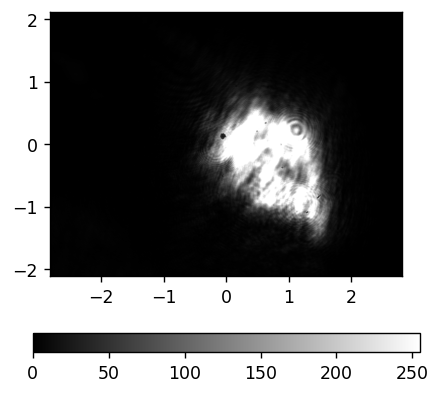

In [28]:
image = pol.camera.Get_Image(is_background=False,rest_background=True,draw=True)
I_Ref_Tot = image

## Normalize

In [12]:
width = 1000
height = 1500
x0 = 1200
y0 = 1500
pol.camera.Set_ROI(width=width, height=height, x=x0, y=y0)

The value of the property resolution is [2560 1920].
ROI y (1500) plus height (1500) higher than resolution (1920). x changed to maximum.


The image obtained is not normalized

In [16]:
Ia = image
print(Ia.shape)

(1500, 1000)


In [17]:
%cd D:\Software\py_lab\py_lab\calibrations\polarimeter

D:\Software\py_lab\py_lab\calibrations\polarimeter


In [18]:
S = np.load("Polarimeter.npz")
S = Stokes().general_azimuth_ellipticity()

In [37]:
%cd D:\Experimentos\Medidas_2D

D:\Experimentos\Medidas_2D


In [38]:
data = np.load("Test.Espejo_45_Degrees.npz")
Mueller_Matrix_Mirror_Camera = Mueller().from_components(data["Mcomp"])

In [54]:
A = Mueller_Matrix_Mirror_Camera[50,50]
print(A)

M_picked = 
[+0.504 +0.243 +0.162 +0.078]   
[+0.057 +0.317 -0.298 +0.421]   
[-0.017 +0.017 +0.296 +0.134]   
[-0.077 +0.143 -0.011 -0.388]   



In [51]:
%cd D:\Experimentos\Medidas_0D\Medidas_22_03_10

D:\Experimentos\Medidas_0D\Medidas_22_03_10


In [52]:
data = np.load("Test.Espejo_45_Degrees.npz")
Mueller_Matrix_Mirror = Mueller().from_components(data["Mcomp"])

In [61]:
B = Mueller_Matrix_Mirror[0]
print(B)

M_picked = 
[+0.543 -0.022 -0.043 +0.005]   
[+0.008 +0.208 -0.472 -0.075]   
[+0.007 -0.491 -0.204 -0.129]   
[-0.015 +0.088 +0.112 -0.521]   



In [57]:
c = np.divide(A,B)

C:\Users\Profesor\AppData\Local\Temp/ipykernel_3840/2514917148.py:1: VisibleDeprecationWarning: Creating an ndarray from nested sequences exceeding the maximum number of dimensions of 32 is deprecated. If you mean to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.divide(A,B)


TypeError: unsupported operand type(s) for ** or pow(): 'Mueller' and 'int'

### Rescale Image 
The image is too large, need a rescalate to calculate the Mueller Matrix

In [26]:
height = 100
width = 100
res = cv2.resize(image, dsize=(height, width), interpolation=cv2.INTER_CUBIC)

In [23]:
## imagen = Image.fromarray(image)
img = Image.fromarray(res)

## Power reference

The power reference is taken measuring the Mueller matrix of air (reflection=False) or a calibration mirror (reflection=True).

In [55]:
pol.Measure_Mueller_Matrix(dim=2,is_ref=True, reflection=True, N=20, filename="Test_Calibration_Mirror")

The Mueller matrix is:
 Test_Calibration_Mirror M00 = [0.10158193 0.10143662 0.09952609 ... 0.14690951 0.14672759 0.14616865]
                        M01 = [0.0108521  0.01047619 0.01251904 ... 0.02038188 0.02032296 0.01943179]
                        M02 = [0.02008181 0.01920826 0.01468254 ... 0.02177861 0.02138579 0.02106111]
                        M03 = [ 1.14707282e-02  1.33217415e-02  1.79336572e-02 ... -1.28443172e-04
 -8.21351552e-05 -4.82202942e-04]
                        M10 = [ 0.00227421  0.00184368  0.0082474  ... -0.04075316 -0.04027144
 -0.04028633]
                        M11 = [ 0.05054101  0.0476266   0.05006488 ... -0.02749268 -0.02724206
 -0.02706992]
                        M12 = [-0.0134241  -0.01663951 -0.00502507 ... -0.05875938 -0.05790948
 -0.05766106]
                        M13 = [0.04280733 0.04135411 0.039367   ... 0.05102476 0.05046936 0.04970577]
                        M20 = [-0.00945857 -0.00825796 -0.01382964 ... -0.00037031 -0.00042521
  0.0004084 ]

C:\Users\Profesor\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



------------------------------------------------------
Polar decomposition of Test_Calibration_Mirror as M = .

Analysis of Diattenuator of Test_Calibration_Mirror as diattenuator:

- Transmissions of Diattenuator of Test_Calibration_Mirror are:
  Max. transmission
[0.12712845 0.12705256 0.12586844 ... 0.17673811 0.17622982 0.17482868]
  Min. transmission
[0.07603542 0.07582067 0.07318374 ... 0.11708091 0.11722536 0.11750862]
  p1
[0.35655077 0.35644434 0.35477943 ... 0.42040231 0.41979736 0.4181252 ]
  p2
[0.2757452  0.27535554 0.27052494 ... 0.34217089 0.34238189 0.3427953 ]
The mean value of param Max. transmission is 0.15766669692248841 +- 0.016957321942097453
The mean value of param Min. transmission is 0.09987206863456367 +- 0.01565054280971859
The mean value of param p1 is 0.39647265685928107 +- 0.021820386922124936
The mean value of param p2 is 0.3150087227901732 +- 0.02532929530538661

- Angles of Diattenuator of Test_Calibration_Mirror are:
  Alpha
[32.43107622 32.92988643 3

Test_Calibration_Mirror M00 = [0.10158193 0.10143662 0.09952609 ... 0.14690951 0.14672759 0.14616865]
                        M01 = [0.0108521  0.01047619 0.01251904 ... 0.02038188 0.02032296 0.01943179]
                        M02 = [0.02008181 0.01920826 0.01468254 ... 0.02177861 0.02138579 0.02106111]
                        M03 = [ 1.14707282e-02  1.33217415e-02  1.79336572e-02 ... -1.28443172e-04
 -8.21351552e-05 -4.82202942e-04]
                        M10 = [ 0.00227421  0.00184368  0.0082474  ... -0.04075316 -0.04027144
 -0.04028633]
                        M11 = [ 0.05054101  0.0476266   0.05006488 ... -0.02749268 -0.02724206
 -0.02706992]
                        M12 = [-0.0134241  -0.01663951 -0.00502507 ... -0.05875938 -0.05790948
 -0.05766106]
                        M13 = [0.04280733 0.04135411 0.039367   ... 0.05102476 0.05046936 0.04970577]
                        M20 = [-0.00945857 -0.00825796 -0.01382964 ... -0.00037031 -0.00042521
  0.0004084 ]
                       

## Measure Mueller Matrix

Here we measure the Mueller matrix of any sample. Important input variables are:
* dim (int): Two Options; select 0 to measure with PHD, any other number for camera. Default: 0
* angles (str): Several options. Default: 'random'.
    * "random": Random angles.
    * 'linspace': Angles generated by linspace. N will be reduced to a number in the form of M^4 where M is an integer. 
* N (int): Number of measurements used. Default: 200.
* filter (bool): If True, the Mueller matrix is filtered to be physcally realizable. Default: True.
* reflection (bool): If True, polarimeter working on reflection, so the calibration data of the 50/50 beam splitter is used. Default: False.
* save_folder (str or None): If not None, it specifies the folder where the measurement will be saved. Default: None.
* filename (str or None): If not None, the filename where the measurement is stored. Default: None.
* verbose (bool): If True, the information is printed after performing the measurement. Default: True.

The matrix components of Inverse of M * M * Inverse of M are:
The mean value of param M00 is 0.5213866748527022 +- 0.049281989476299304
The mean value of param M01 is 0.2449694568326992 +- 0.04369884916795784
The mean value of param M02 is 0.10668328147573956 +- 0.07211729414508683
The mean value of param M03 is 0.07561163957607618 +- 0.04014173735122352
The mean value of param M10 is 0.04692236418126222 +- 0.15430498965724745
The mean value of param M11 is 0.2878751539877851 +- 0.11216574528619991
The mean value of param M12 is -0.23140339479580047 +- 0.10318017945127811
The mean value of param M13 is 0.35534304256631155 +- 0.11286496992064422
The mean value of param M20 is 0.016844350903195686 +- 0.11756865069746995
The mean value of param M21 is 0.028615984237459827 +- 0.09447173182347851
The mean value of param M22 is 0.2352165449990541 +- 0.19791295197973002
The mean value of param M23 is 0.1085053185907209 +- 0.15302529922403818
The mean value of param M30 is -0.06702994985406857

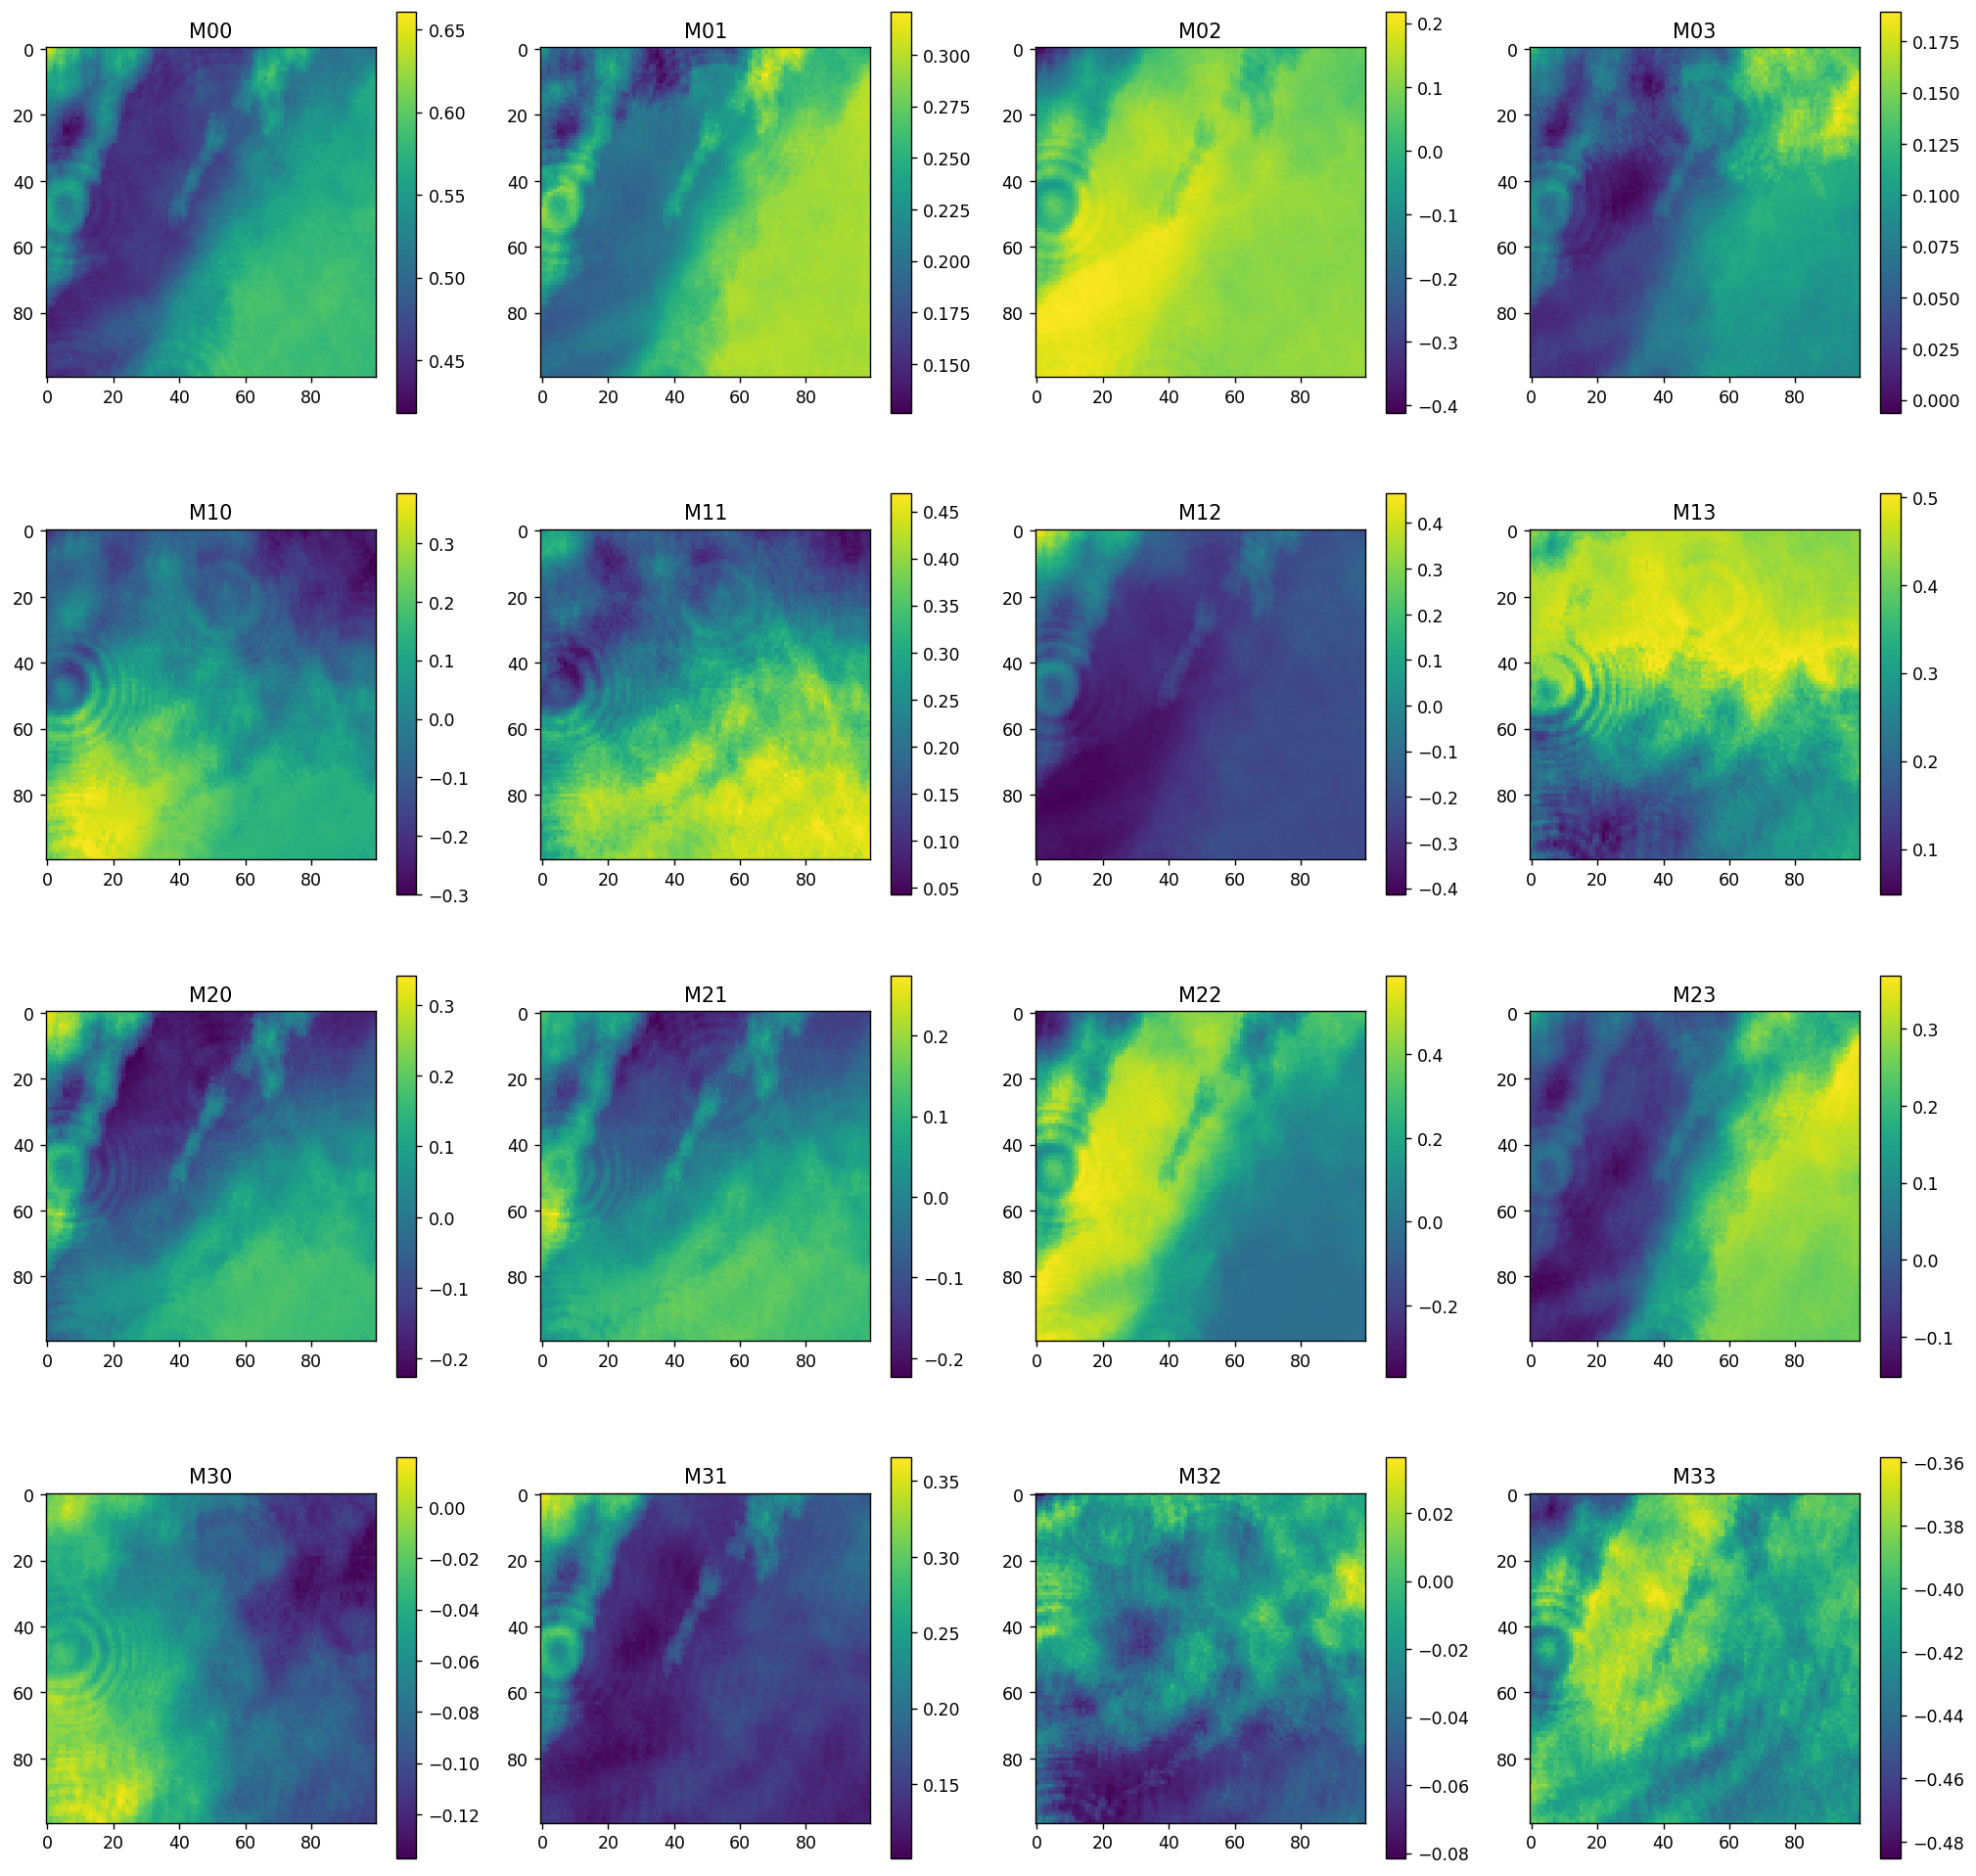

In [58]:
Msample = pol.Measure_Mueller_Matrix(dim=2,filename="Test.Espejo_45_Degrees.npz", reflection=True, N=20)

In [8]:
pol.Close()